### NOTEBOOK DESCRIPTION:

This notebook does the axis projection based on age and gender axis as well as a validation technique based on the generated axis

In [1]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


scriptpath = "/home/jouven/youtube_projects/"
sys.path.append(os.path.abspath(scriptpath))

from helpers.helpers_channels_more_300 import *
from helpers.helpers_channel_embedding import *
from helpers.helpers_visualization_axis_projection import *

### Selected parameters for the axis projection

In [2]:
# Number of neirest neighbors taken
k = 10

# Selected number of pairs to create the axis
nb_selected_pairs = 6

### Useful functions

In [3]:
PATH = '/dlabdata1/youtube_large/jouven/word2vec_pytorch/run_channels_more_300/combination_then_channel_sampling/CONTEXT_True_100_SUBSAMPLING_False_0.0043_LR_0.005/models/embedding.csv.gz'

In [4]:
dict_channel_ind, dict_ind_channel, channels_id = filtered_channels_index_id_mapping()

## Finding cultural axis for our channel embedding

In [5]:
selected_channels = []
for channel in channels_id:
    selected_channels.append(dict_channel_ind[channel])

In [6]:
channelcrawler_projection = pd.read_csv("/dlabdata1/youtube_large/df_channels_en.tsv.gz", sep='\t')
# Select the rows being in the select channels
channelcrawler_projection = channelcrawler_projection[channelcrawler_projection['channel'].apply(lambda row: row in channels_id)]

In [7]:
channelcrawler_projection.head()

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.087
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.087
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.087
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.087


### Gender axis: men vs women

In [8]:
# Here you will find everything about: Men's Fashion, Hairstyle, Fitness & Health, Personal Vlogs and Tech.
channelcrawler_projection[channelcrawler_projection['name_cc'] == 'Alex Costa']

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
2519,Howto & Style,2011-09-29,UCZyCposXwcyopaACep44maQ,Alex Costa,2120000,543,5370.0,2.417


In [9]:
# vlog channel about make up, hair transformation, rings selections, ...
channelcrawler_projection[channelcrawler_projection['name_cc'] == 'Shaaanxo']

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
1737,Howto & Style,2009-01-18,UCMpOz2KEfkSdd5JeIJh_fxw,Shaaanxo,3215340,1422,3566.0,2.278


In [10]:
gender_seed = (dict_channel_ind['UCMpOz2KEfkSdd5JeIJh_fxw'], dict_channel_ind['UCZyCposXwcyopaACep44maQ'])

gender_axis, df_gender_axis = compute_axis_vector_based_on_seed(PATH, k, gender_seed, nb_selected_pairs, selected_channels, channelcrawler_projection, dict_ind_channel)


In [11]:
df_gender_axis

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
124,Entertainment,2015-12-01,UCucot-Zp428OwkyRm2I7v2Q,James Charles,16100000,234,190.0,2.0870
83,Entertainment,2015-08-29,UCG8rbF3g2AMX70yOd8vqIZg,Logan Paul Vlogs,19800000,645,136.0,2.0870
5072,Howto & Style,2008-04-07,UC0FK_3h0Ec2iBKJ_Ah2su7A,itsjudytime,1330000,643,11957.0,2.6995
817,Education,2006-11-17,UC4a-Gbdw7vOaccHmFo40b9g,Khan Academy,5060000,7445,1557.0,2.0870
1504,Entertainment,2015-04-28,UCoc_XJPj6YLMQDWtPDQcDtA,Brad Mondo,3300000,254,3055.0,2.2320
2864,Howto & Style,2013-10-29,UC2-_WWPT_124iN6jiym4fOw,Asian Boss,1810000,484,6224.0,2.4635
99840,Howto & Style,2006-09-19,UCaq6DCIyl1i_Q52AHpYDdsQ,Bath & Body Works,20600,139,544678.0,8.2610
111379,Howto & Style,2010-01-23,UC56cNeUHJYDJIrW7YJJRZVA,Classy Cheapskate,16200,154,655103.0,8.5270
6343,Gaming,2013-01-31,UCBrMq7wkdPWb3PxR-GUR61A,Hay Day,1010000,73,15439.0,2.8235
29622,People & Blogs,2013-04-16,UCwcuLrTyxEGKq21fGXdLb6A,Better World,189000,29,96658.0,3.5450


### Age axis: kids vs adult

In [12]:
# Animation for kids
channelcrawler_projection[channelcrawler_projection['name_cc'] == "Magpiepony"]

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
8280,Film and Animation,2013-12-17,UCISF5OGuAtSLNF24TKTnXag,Magpiepony,736000,304,21120.0,2.9225


In [13]:
# Channel analysing the films
channelcrawler_projection[channelcrawler_projection['name_cc'] == 'Beyond The Trailer']

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
7841,Entertainment,2008-11-03,UCAXR2zenCwvRIyQd9ydtfaA,Beyond The Trailer,853000,5064,19744.0,2.8635


In [14]:
age_seed = (dict_channel_ind['UCISF5OGuAtSLNF24TKTnXag'], dict_channel_ind['UCAXR2zenCwvRIyQd9ydtfaA'])

age_axis, df_output_age = compute_axis_vector_based_on_seed(PATH, k, age_seed, nb_selected_pairs, selected_channels, channelcrawler_projection, dict_ind_channel)

In [15]:
df_output_age

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
25655,Entertainment,2006-03-07,UCWP69o3B8jKd-Hz7NVILWTw,JHaller,222000,393,80049.0,4.1515
1806,Gaming,2008-04-05,UC22TOQWJue006Lp6DB5QhDA,UberHaxorNova,3080000,5787,3754.0,2.2765
22698,Gaming,2009-10-26,UCODf0evwDARJHE9BilifYEQ,Ratchet Noblewolf,240000,1952,69477.0,3.9050
15980,Gaming,2012-01-11,UCn_c8Eon88kdig-n0WDSrdg,RandomBlackGamer,374000,532,45235.0,3.3430
4332,Film and Animation,2012-09-09,UCzfyYtgvkx5mLy8nlLlayYg,Vivziepop,1430000,225,10041.0,2.6435
629,Film and Animation,2008-10-03,UCOpcACMWblDls9Z6GERVi1A,Screen Junkies,6660000,1014,1096.0,2.0870
1180,Entertainment,2010-08-25,UCYAB7hh1ohA8-iX54EpMdeA,Moriah Elizabeth,3510000,215,2307.0,2.1670
304,Entertainment,2012-08-24,UCd1fLoVFooPeWqCEYVUJZqg,Matt Stonie,9580000,343,496.0,2.0870
41,Gaming,2012-05-26,UC7_YxT-KID8kRbqZo7MyscQ,Markiplier,24400000,4484,86.0,2.0870
208,Gaming,2006-09-19,UCKy1dAqELo0zrOtPkf0eTMw,IGN,12400000,134606,333.0,2.0870


## Validation of the created axis

In [16]:
EMBEDDING = get_dataframe_in_embedding_space(PATH)

In [17]:
# Select the rows being in the select channels (english channels)
channelcrawler = pd.read_csv("/dlabdata1/youtube_large/df_channels_en.tsv.gz", sep='\t')
channelcrawler = channelcrawler[channelcrawler['channel'].apply(lambda row: row in channels_id)]

In [18]:
dict_idx_name, dict_name_idx = channel_to_name(channelcrawler, dict_channel_ind)

#### 1. Projection of the gender axis

In [19]:
df_gender_projection = create_projection(EMBEDDING, gender_axis, dict_idx_name)

In [20]:
# Inverse the signs for color matiching ...
df_gender_projection['projection'] = -df_gender_projection['projection']

In [21]:
df_gender_projection.head()

,name,projection
0,Winded Voyage Sailin...,0.312955
1,The Night Fury,0.515675
2,Red Bull Surfing,2.479996
3,Heidi Joubert,4.405351
4,MR JC,-0.270370


In [22]:
seed_gender_name = ('Alex Costa', 'Shaaanxo')

No handles with labels found to put in legend.


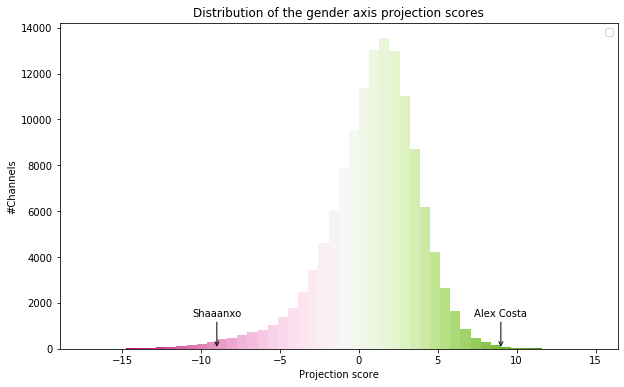

In [23]:
visualization(df_gender_projection, seed_gender_name, 'PiYG', 50, 'Distribution of the gender axis projection scores')

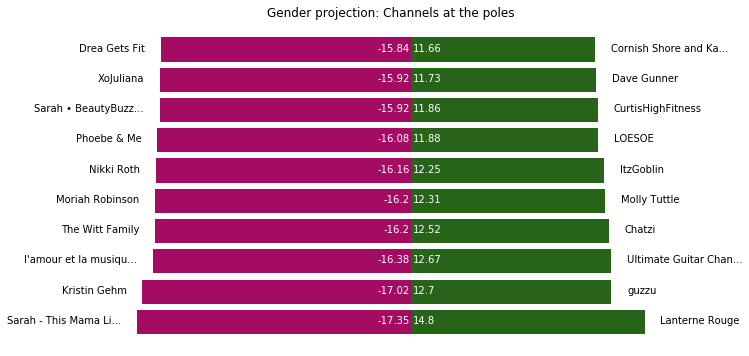

In [24]:
color = 'PiYG'
cm = plt.cm.get_cmap(color)
selected_pairs = 10

df_left  = df_gender_projection.sort_values(by = ['projection'])[:selected_pairs]
df_right = df_gender_projection.sort_values(by = ['projection'], ascending = False)[:selected_pairs]
create_plot(df_left, df_right, selected_pairs, "Gender projection: Channels at the poles", (10, 6), cm)

In the plot above, negative projection value should correspond to men channel whereas positive projection value should correspond to women channel.

In [25]:
'''
color = 'PiYG'
cm = plt.cm.get_cmap(color)
selected_pairs = 10

mask     = df_gender_projection['projection'].gt(0)
df_left  = df_gender_projection[~mask]
df_left  = df_left.iloc[random.sample(list(np.arange(len(df_left))), selected_pairs)].sort_values(by = ['projection'])
df_right = df_gender_projection[mask]
df_right = df_right.iloc[random.sample(list(np.arange(len(df_right))), selected_pairs)].sort_values(by = ['projection'], ascending = False)
create_plot(df_left, df_right, selected_pairs, "Gender projection: Channels taken at random", (7, 6))
'''

'\ncolor = \'PiYG\'\ncm = plt.cm.get_cmap(color)\nselected_pairs = 10\n\nmask     = df_gender_projection[\'projection\'].gt(0)\ndf_left  = df_gender_projection[~mask]\ndf_left  = df_left.iloc[random.sample(list(np.arange(len(df_left))), selected_pairs)].sort_values(by = [\'projection\'])\ndf_right = df_gender_projection[mask]\ndf_right = df_right.iloc[random.sample(list(np.arange(len(df_right))), selected_pairs)].sort_values(by = [\'projection\'], ascending = False)\ncreate_plot(df_left, df_right, selected_pairs, "Gender projection: Channels taken at random", (7, 6))\n'

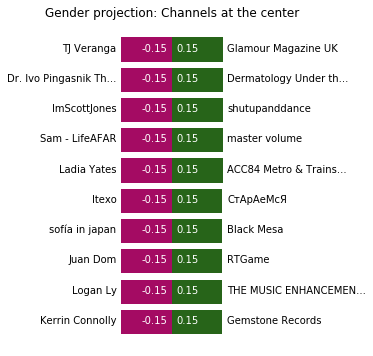

In [26]:
color = 'PiYG'
cm = plt.cm.get_cmap(color)
selected_pairs = 10

mask     = df_gender_projection['projection'].gt(-0.15)
df_left  = df_gender_projection[~mask].sort_values(by = ['projection'], ascending = False)[:selected_pairs]
mask     = df_gender_projection['projection'].gt(0.15)
df_right = df_gender_projection[mask].sort_values(by = ['projection'])[:selected_pairs]
create_plot(df_left, df_right, selected_pairs, "Gender projection: Channels at the center", (2, 6), cm, 7)

For channels at the borders we also observe a good classification of the different channels even if sometimes channels are hard to classify in terms of men vs women projection.

Indeed, for example `Bentheloony` a cartoon channel, `Jason A` exposing statements made by celebrities or `The Tube Family` are classify as women channels but it would also make sense to classify them as men channels.

On the men side, we observe a clearer distinction with gaming channels such as `The 8 bit Arcade`, `Infexious Rogue Guidance`, `Warrior From Heaven` or extreme jumps presented by the `Base Jump XTreme` channel.

However, some misclassfications exist: `moonlight subliminals` a girl channel classified as men or `AshesWolf` a gaming channel classified as women. These misclassifcation are maybe due to the number of subscribers which are around 73k for `moonlight subliminals` and around 37k for `AshesWolf`.

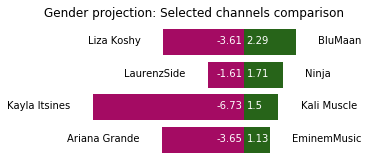

In [27]:
df_right = pd.DataFrame()
df_right = df_right.append(df_gender_projection[df_gender_projection['name'] == 'EminemMusic'])
df_right = df_right.append(df_gender_projection[df_gender_projection['name'] == 'Kali Muscle'])
df_right = df_right.append(df_gender_projection[df_gender_projection['name'] == 'Ninja'])
df_right = df_right.append(df_gender_projection[df_gender_projection['name'] == 'BluMaan'])

df_left = pd.DataFrame()
df_left = df_left.append(df_gender_projection[df_gender_projection['name'] == 'Ariana Grande'])
df_left = df_left.append(df_gender_projection[df_gender_projection['name'] == 'Kayla Itsines'])
df_left = df_left.append(df_gender_projection[df_gender_projection['name'] == 'LaurenzSide'])
df_left = df_left.append(df_gender_projection[df_gender_projection['name'] == 'Liza Koshy'])

color = 'PiYG'
cm = plt.cm.get_cmap(color)

create_plot(df_left, df_right, 4, "Gender projection: Selected channels comparison", (4, 2.5), cm)


Select reknown girl or men like channels and validate if these channels are indeed correctly classified.
- first line: fashion channels
- second line: gaming channels
- third line: fitness channels
- fourth line: music channels

#### 2. Projection on the age axis

Channels having a negative projections score should correspond to adult channels, positive projections score should correspond to kids channels

In [28]:
df_age_projection = create_projection(EMBEDDING, age_axis, dict_idx_name)
df_age_projection.head()

,name,projection
0,Winded Voyage Sailin...,-1.501239
1,The Night Fury,3.302108
2,Red Bull Surfing,-1.729329
3,Heidi Joubert,-2.965041
4,MR JC,-0.146563


No handles with labels found to put in legend.


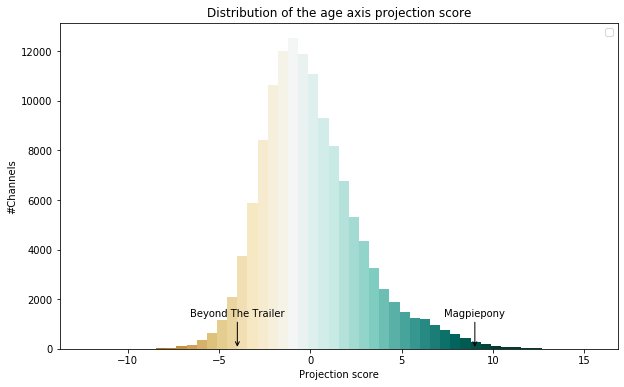

In [29]:
age_seed_name = ("Magpiepony", 'Beyond The Trailer')
visualization(df_age_projection, age_seed_name, 'BrBG', 40, 'Distribution of the age axis projection score')

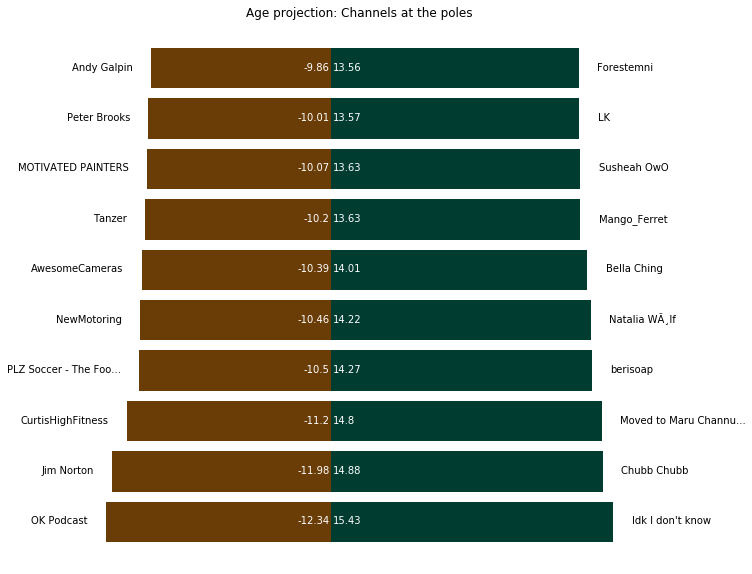

In [30]:
color = 'BrBG'
cm = plt.cm.get_cmap(color)
selected_pairs = 10

df_left  = df_age_projection.sort_values(by = ['projection'])[:selected_pairs]
df_right = df_age_projection.sort_values(by = ['projection'], ascending = False)[:selected_pairs]
create_plot(df_left, df_right, selected_pairs, "Age projection: Channels at the poles", (10, 10), cm)

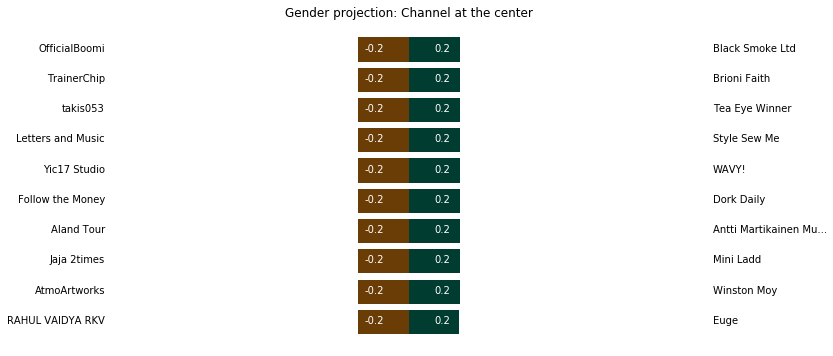

In [31]:
color = 'BrBG'
cm = plt.cm.get_cmap(color)
selected_pairs = 10

mask     = df_age_projection['projection'].gt(-0.2)
df_left  = df_age_projection[~mask].sort_values(by = ['projection'], ascending = False)[:selected_pairs]
mask     = df_age_projection['projection'].gt(0.2)
df_right = df_age_projection[mask].sort_values(by = ['projection'])[:selected_pairs]
create_plot(df_left, df_right, selected_pairs, "Gender projection: Channel at the center", (2, 6), cm, 1)

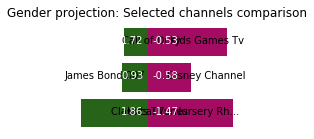

In [32]:
df_left = pd.DataFrame()
df_left = df_left.append(df_gender_projection[df_gender_projection['name'] == 'Classical Tunes'])
df_left = df_left.append(df_gender_projection[df_gender_projection['name'] == 'James Bond 007'])
df_left = df_left.append(df_gender_projection[df_gender_projection['name'] == 'Call of Duty'])

df_right = pd.DataFrame()
df_right = df_right.append(df_gender_projection[df_gender_projection['name'] == 'Kids TV - Nursery Rh...'])
df_right = df_right.append(df_gender_projection[df_gender_projection['name'] == 'Disney Channel'])
df_right = df_right.append(df_gender_projection[df_gender_projection['name'] == 'Kids Games Tv'])

color = 'PiYG'
cm = plt.cm.get_cmap(color)

create_plot(df_left, df_right, 3, "Gender projection: Selected channels comparison", (3, 2), cm)
